In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from prince import FAMD
from scipy import sparse
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import joblib
from tpot import TPOTClassifier, TPOTRegressor

In [3]:
def encoder(df, col_split):
    """
    Prepares the data for the model by standardizing the continuous features, 
    converting the categorical features to strings, 
    and converting sparse columns to a dense format for FAMD.
    """
    categorical_cols = df.columns[:col_split]

    # converting the categorical features to strings
    df[categorical_cols] = df[categorical_cols].astype(str)

    return df

def load_data(data_address='beta_dates/beta_data_2_42.csv', label_address='beta_dates/true_labels.csv'):
    df = pd.read_csv(data_address, index_col=0)
    y = pd.read_csv(label_address, index_col=0).values[:,0]
    y = y + 1
    X = encoder(df, 4)

    return X, y

In [6]:
# Load your dataset
X, y = load_data()

famd = FAMD(n_components=6)
famd.fit(X)
X = famd.transform(X)

# Define the split point for the dataset (for example, 80% of the data)
split_point = int(len(X) * 0.8)

# Split the data at the specific point
X_train = X.iloc[:split_point]
y_train = y[:split_point]
X_test = X.iloc[split_point:]
y_test = y[split_point:]

# Instantiate TPOTClassifier
tpot = TPOTClassifier(verbosity=2, n_jobs=-1)

# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Evaluate the model on the test data
print("Test Accuracy:", tpot.score(X_test, y_test))

# Print classification report
predictions = tpot.predict(X_test)
print(classification_report(y_test, predictions))

# Optionally, export the best pipeline
tpot.export('best_tpot_pipeline.py')

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8126849894291756

Generation 2 - Current best internal CV score: 0.8127906976744186

Generation 3 - Current best internal CV score: 0.8127906976744186

Generation 4 - Current best internal CV score: 0.8127906976744186

Generation 5 - Current best internal CV score: 0.817336152219873

Generation 6 - Current best internal CV score: 0.817336152219873

Generation 7 - Current best internal CV score: 0.8175475687103594

Generation 8 - Current best internal CV score: 0.8175475687103594

Generation 9 - Current best internal CV score: 0.8175475687103594

Generation 10 - Current best internal CV score: 0.8175475687103594

Generation 11 - Current best internal CV score: 0.8175475687103594

Generation 12 - Current best internal CV score: 0.8175475687103594

Generation 13 - Current best internal CV score: 0.8175475687103594

Generation 14 - Current best internal CV score: 0.8217758985200845

Generation 15 - Current best internal CV score: 0.82177589

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
df = pd.read_csv('beta_dates/beta_data_2_42.csv', index_col=0)
X = encoder(df, 4)
y = pd.read_csv('beta_dates/true_labels.csv', index_col=0).values[:,1]

famd = FAMD(n_components=6)
famd.fit(X)
X = famd.transform(X)

# Define the split point for the dataset (for example, 80% of the data)
split_point = int(len(X) * 0.8)

# Split the data at the specific point
X_train = X.iloc[:split_point]
y_train = y[:split_point]
X_test = X.iloc[split_point:]
y_test = y[split_point:]

# Instantiate TPOTClassifier
tpot = TPOTRegressor(verbosity=2, n_jobs=-1)

# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Evaluate the model on the test data
print("Test Accuracy:", tpot.score(X_test, y_test))

# Optionally, export the best pipeline
tpot.export('best_tpot_regression_pipeline.py')

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.5517796042914922

Generation 2 - Current best internal CV score: -1.5517796042914922

Generation 3 - Current best internal CV score: -1.5517796042914922

Generation 4 - Current best internal CV score: -1.5359147764352685

Generation 5 - Current best internal CV score: -1.5359147764352685

Generation 6 - Current best internal CV score: -1.4800000902894652

Generation 7 - Current best internal CV score: -1.4800000902894652

Generation 8 - Current best internal CV score: -1.4545192489007945

Generation 9 - Current best internal CV score: -1.4545192489007945

Generation 10 - Current best internal CV score: -1.4545192489007945

Generation 11 - Current best internal CV score: -1.4545192489007945

Generation 12 - Current best internal CV score: -1.4545192489007945

Generation 13 - Current best internal CV score: -1.2437693951699687

Generation 14 - Current best internal CV score: -1.2437693951699687

Generation 15 - Current best internal CV s

ValueError: continuous is not supported

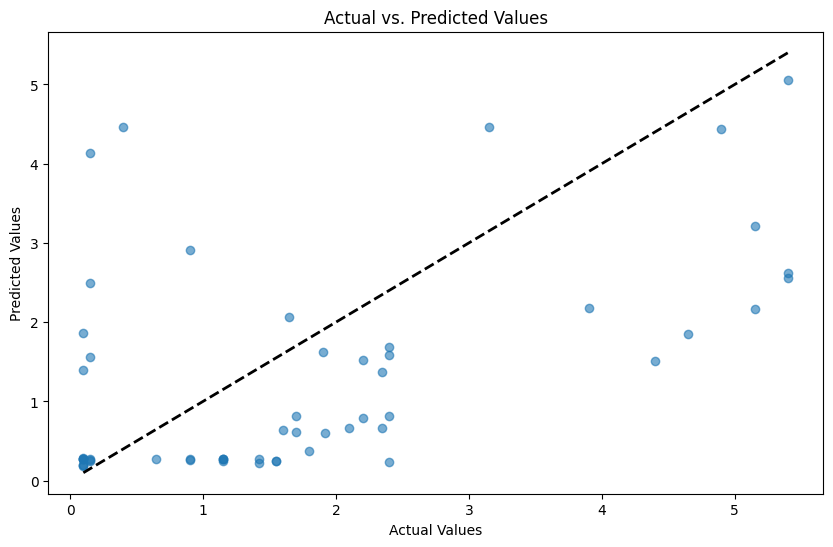

In [13]:
# Generate predictions
predictions = tpot.predict(X_test)

# Optionally, export the best pipeline
tpot.export('best_tpot_regression_pipeline.py')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()


In [12]:
print("Test Accuracy:", tpot.score(X_test, y_test))

Test Accuracy: -2.407043409396804


In [39]:
# Load your data
X, y = load_data()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Parameters for Random Forest
params = {
    'rf__max_depth': 4,
    'rf__max_features': 0.65,
    'rf__min_samples_leaf': 6,
    'rf__min_samples_split': 17,
    'rf__n_estimators': 200
}

# Create the pipeline with FAMD and RandomForestClassifier
pipe = Pipeline([
    ('famd', FAMD(n_components=6)),  # FAMD with 6 components
    ('rf', RandomForestClassifier()) # Random Forest Classifier
])

# Set the parameters for the pipeline
pipe.set_params(**params)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = pipe.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

# Print the classification report on the test data
print(classification_report(y_test, pipe.predict(X_test)))

# Save the model
joblib.dump(pipe, 'random_forest_famd_model.pkl')
# Load your data
X, y = load_data()

# Apply FAMD for dimensionality reduction
famd = FAMD(n_components=6)
famd.fit(X)
X_transformed = famd.transform(X)

# Create a pipeline with the best parameters
pipe = Pipeline([
    ('xgb', XGBClassifier(objective='multi:softmax'))  # Example for a classification task
])

# Set the parameters for the pipeline
params = {
    'xgb__colsample_bytree': 0.8314087089720534, 
    'xgb__gamma': 2.068218435894297, 
    'xgb__learning_rate': 0.7757676744286774, 
    'xgb__max_depth': 4, 
    'xgb__min_child_weight': 5.920879982985454, 
    'xgb__n_estimators': 156, 
    'xgb__reg_alpha': 2.0124120042376505, 
    'xgb__reg_lambda': 4.703662676675085, 
    'xgb__subsample': 0.7918852620425526
}
pipe.set_params(**params)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipe.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy:', accuracy)

# Print the classification report
print(classification_report(y_test, predictions))

# Save the model
joblib.dump(pipe, 'random_forest_famd_model.pkl')

Test Accuracy: 0.7818181818181819
              precision    recall  f1-score   support

         0.0       0.75      0.30      0.43        10
         1.0       0.77      0.94      0.85        35
         2.0       0.88      0.70      0.78        10

    accuracy                           0.78        55
   macro avg       0.80      0.65      0.68        55
weighted avg       0.78      0.78      0.76        55

Test Accuracy: 0.8363636363636363
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.91      0.89      0.90        44
         2.0       0.56      0.83      0.67         6

    accuracy                           0.84        55
   macro avg       0.71      0.71      0.69        55
weighted avg       0.85      0.84      0.84        55



['random_forest_famd_model.pkl']

In [48]:
# Load your data
X, y = load_data()

famd = FAMD(n_components=6)
famd.fit(X)
X_transformed = famd.transform(X)


# Define the pipeline
pipe = Pipeline([
    ('rf', RandomForestClassifier()),
])

# Set pipeline parameters
params = {'rf__max_depth': 4, 'rf__max_features': 0.65, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 17, 'rf__n_estimators': 200}
pipe.set_params(**params)

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# List to store accuracy scores for this iteration
accuracy_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in skf.split(X_transformed, y):
    X_train, X_test = X_transformed.iloc[train_index], X_transformed.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the pipeline and make predictions
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)

    # Calculate and store accuracy
    accuracy_scores.append(accuracy_score(y_test, predictions))

# Calculate average accuracy for this iteration
avg_accuracy = np.mean(accuracy_scores)

# Print the accuracy scores
print('Accuracy Scores: {} \n'.format(accuracy_scores))
print('Average Accuracy: {}'.format(avg_accuracy))


Accuracy Scores: [0.8363636363636363, 0.7454545454545455, 0.7818181818181819, 0.8181818181818182, 0.8333333333333334] 

Average Accuracy: 0.8030303030303031


In [76]:
# Load your data
X, y = load_data()

famd = FAMD(n_components=6)
famd.fit(X)
X = famd.transform(X)


# create a pipeline with the best parameters
pipe = Pipeline([
    ('xgb', XGBClassifier(objective='multi:softmax'))  # Example for a classification task
])

# Perform K-Fold Cross-Validation

# set the parameters to the mean values
params = {
    'xgb__colsample_bytree': 0.8314087089720534, 
    'xgb__gamma': 2.068218435894297, 
    'xgb__learning_rate': 0.7757676744286774, 
    'xgb__max_depth': 4, 
    'xgb__min_child_weight': 5.920879982985454, 
    'xgb__n_estimators': 156, 
    'xgb__reg_alpha': 2.0124120042376505, 
    'xgb__reg_lambda': 4.703662676675085, 
    'xgb__subsample': 0.7918852620425526}

pipe.set_params(**params)
# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# List to store accuracy scores for this iteration
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = pipe.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, predictions))

# Calculate average accuracy for this iteration
avg_accuracy = np.mean(accuracy_scores)

# Print the accuracy scores
print('Accuracy Scores: {} \n'.format(accuracy_scores))
print('Average Accuracy: {}'.format(avg_accuracy))


Accuracy Scores: [0.7454545454545455, 0.7454545454545455, 0.8363636363636363, 0.7454545454545455, 0.7777777777777778] 

Average Accuracy: 0.7701010101010101


In [51]:
# Load your data
X, y = load_data()

# Parameters for both Random Forest and XGBClassifier
rf_params = {
    'rf__max_depth': 4,
    'rf__max_features': 0.65,
    'rf__min_samples_leaf': 6,
    'rf__min_samples_split': 17,
    'rf__n_estimators': 200
}

xgb_params = {
    'xgb__colsample_bytree': 0.8314087089720534, 
    'xgb__gamma': 2.068218435894297, 
    'xgb__learning_rate': 0.7757676744286774, 
    'xgb__max_depth': 4, 
    'xgb__min_child_weight': 5.920879982985454, 
    'xgb__n_estimators': 156, 
    'xgb__reg_alpha': 2.0124120042376505, 
    'xgb__reg_lambda': 4.703662676675085, 
    'xgb__subsample': 0.7918852620425526
}

# Number of iterations
iterations = 30

# Initialize lists to store accuracies for each model
rf_accuracies = []
xgb_accuracies = []

for _ in range(iterations):
    # Split the data for Random Forest pipeline
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    split_index = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Create and fit the Random Forest pipeline
    rf_pipe = Pipeline([
        ('famd', FAMD(n_components=6)),
        ('rf', RandomForestClassifier())
    ])
    rf_pipe.set_params(**rf_params)
    rf_pipe.fit(X_train, y_train)

    # Evaluate the Random Forest model
    rf_accuracies.append(rf_pipe.score(X_test, y_test))

    # Apply FAMD and create the XGBClassifier pipeline
    famd = FAMD(n_components=6)
    famd.fit(X_train)
    X_xgb_train_transformed = famd.transform(X_train)
    X_xgb_test_transformed = famd.transform(X_test)

    xgb_pipe = Pipeline([
        ('xgb', XGBClassifier(objective='multi:softmax'))
    ])
    xgb_pipe.set_params(**xgb_params)
    xgb_pipe.fit(X_xgb_train_transformed, y_train)

    # Evaluate the XGBClassifier model
    xgb_accuracies.append(xgb_pipe.score(X_xgb_test_transformed, y_test))

# Calculate the average accuracy for each model
avg_rf_accuracy = np.mean(rf_accuracies)
avg_xgb_accuracy = np.mean(xgb_accuracies)

# Print the average accuracies
print('Average RF Accuracy:', avg_rf_accuracy)
print('Average XGB Accuracy:', avg_xgb_accuracy)

Average RF Accuracy: 0.516969696969697
Average XGB Accuracy: 0.5454545454545453


In [54]:
# find how many counts of each class are in the y_test
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))
30/55

{0.0: 5, 1.0: 30, 2.0: 20}


0.5454545454545454